<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Communicate_Data_Findings/SandBox/Bivariate_Exploration_Fuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bivariate Exploration Pattern Language
## Dataset: Fuel_Econ

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the csv file, and check its shape and head
path = 'https://github.com/lustraka/Data_Analysis_Workouts/raw/main/Communicate_Data_Findings/SandBox/'
fuel_econ = pd.read_csv(path + 'fuel-econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


## Scatter Plot

A **scatterplot** is used to show the relationship between two quantitative variables. The two variables are indicated on X and Y-axis, respectively. Through the scatterplots, we can see clearly how these two variables correlate with each other.

To quantify how strong the correlation is between the variables, we use a correlation coefficient. **Pearson correlation coefficient (r)** captures linear relationships. It is a value ranging from -1 to +1.

###  The relationship between fuel mileage ratings for city vs. highway driving

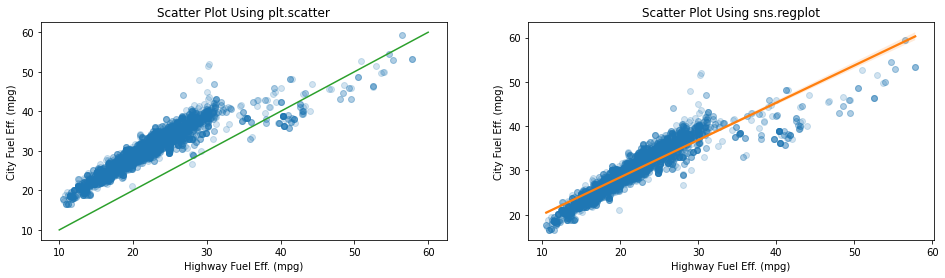

In [2]:
# Initialize a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=[16,4])

# CHART ON LEFT - plt.scatter with a diagonal
axs[0].scatter(data=fuel_econ, x='city', y='highway', alpha=0.2)
axs[0].set(xlabel='Highway Fuel Eff. (mpg)', ylabel='City Fuel Eff. (mpg)', 
           title='Scatter Plot Using plt.scatter')
# Plot diagonal line from (10,10) to (60,60)
axs[0].plot([10,60], [10,60], color=sns.color_palette()[2])

# CHART ON RIGHT - sns.regplot with a regression line
sns.regplot(data=fuel_econ, x='city', y='highway', scatter_kws={'alpha':0.2},
            line_kws={'color':sns.color_palette()[1]}, ax=axs[1])
axs[1].set(xlabel='Highway Fuel Eff. (mpg)', ylabel='City Fuel Eff. (mpg)', 
           title='Scatter Plot Using sns.regplot')

plt.show()

Most of the data fall in a large blob between 10 and 30 mpg city and 20 to 40 mpg highway. Interestingly, for most cars highway mileage is clearly higher than city mileage, but for those cars with city mileage above about 30 mpg, the distinction is less pronounced. In fact, most cars above 45 mpg city have better city mileage than highway mileage, contrary to the main trend.

## Heat Maps
A **heat map** is a 2-d version of the histogram that can be used as an alternative to a scatterplot.

### How does the engine size relate to a car's CO2 footprint?

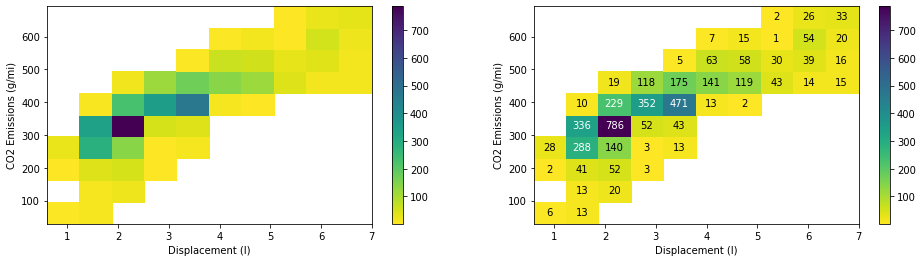

In [4]:
# Initialize a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=[16,4])

# CHART ON LEFT - plt.hist2d
hmp = axs[0].hist2d(data=fuel_econ, x='displ', y='co2',
              cmin=0.5, cmap='viridis_r')
axs[0].set(xlabel='Displacement (l)', ylabel='CO2 Emissions (g/mi)')
plt.colorbar(hmp[3], ax=axs[0])

# CHART ON RIGHT - plt.hist2d annotated
hmp = axs[1].hist2d(data=fuel_econ, x='displ', y='co2',
              cmin=0.5, cmap='viridis_r')
axs[1].set(xlabel='Displacement (l)', ylabel='CO2 Emissions (g/mi)')
plt.colorbar(hmp[3], ax=axs[1])

# Select the bi-dimensional histogram with conts
counts = hmp[0]

# Add text annotation on each cell
for i in range(counts.shape[0]):
  for j in range(counts.shape[1]):
    c = counts[i,j]
    # Increase visibility on darker cells
    if c > 200:
      plt.text(hmp[1][i]+0.3, hmp[2][j]+35, int(c), ha='center', va='center', color='white')
    elif c > 0:
      plt.text(hmp[1][i]+0.3, hmp[2][j]+35, int(c), ha='center', va='center')

plt.show()

The visualization shows that most cars fall in a line where larger engine sizes correlate with higher emissions. The trend is somewhat broken by those cars with the lowest emissions, which still have engine sizes shared by most cars (between 1 and 3 liters).

## Violin & Box Plot

A **violin plot** is used to show a distibution of the values on the numeric variable for each level of the categorical variable. The distribution is plotted as a kernel density estimate, something like a smoothed histogram.

A **box plot** is used to show the relationship between a numeric variable and a categorical variable. In a box, the central line indicates the median, the upper and lower edges show the 1st and 3rd quartiles. Whiskers outside of the box indicate the largest and smallest values. Box plots also have outliers plotted as points. Compared to the violin plot, the box plot leans more on the summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level.

In [5]:
fuel_econ.VClass.unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [6]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

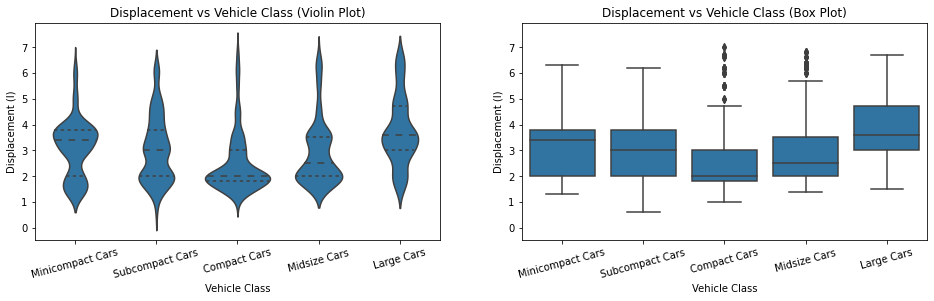

In [27]:
# Initialize a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=[16,4])
base_color = sns.color_palette()[0]

# LEFT chart: violin plot
sns.violinplot(data=fuel_econ, x='VClass', y='displ', color=base_color, inner='quartile', ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=15)
axs[0].set(xlabel='Vehicle Class', ylabel='Displacement (l)', 
           title='Displacement vs Vehicle Class (Violin Plot)')

# RIGHT chart: box plot
sns.boxplot(data=fuel_econ, x='VClass', y='displ', color=base_color, ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=15)
axs[1].set_ylim(axs[0].get_ylim())
axs[1].set(xlabel='Vehicle Class', ylabel='Displacement (l)', 
           title='Displacement vs Vehicle Class (Box Plot)')

plt.show()

One of the interesting things about the relationship between variables is that it isn't consistent. Compact cars tend to have smaller engine sizes than mini-compact and subcompact cars, even though those two vehicle sizes are smaller. The box plot make it easier to see that the median displacement for the two smallest vehicle classes is greater than the third quartile of the compact car class.

## Clustered Bar Charts

To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a **clustered bar chart**. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's `countplot` function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument.

One alternative way of depicting the relationship between two categorical variables is through a **heat map**. Heat maps were introduced earlier as the 2-D version of a histogram; here, we're using them as the 2-D version of a bar chart. The seaborn function `heatmap()` is at home with this type of heat map implementation, but the input arguments are unlike most of the visualization functions that have been introduced in this course. Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.

In [29]:
fuel_econ.fuelType.value_counts()

Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: fuelType, dtype: int64

In [45]:
# Prepare data for plotting
# df = fuel_econ.query('fuelType == "Premium Gasoline" or fuelType == "Regular Gasoline"')
df = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

# Group the data, reset index, rearrange the data
cf_counts = df.groupby(['VClass', 'fuelType']).size()
cf_counts = cf_counts.reset_index(name='count')
cf_counts = cf_counts.pivot(index='VClass', columns='fuelType', values='count')
cf_counts

fuelType,Premium Gasoline,Regular Gasoline
VClass,,
Minicompact Cars,318,3
Subcompact Cars,534,132
Compact Cars,593,490
Midsize Cars,509,640
Large Cars,348,256


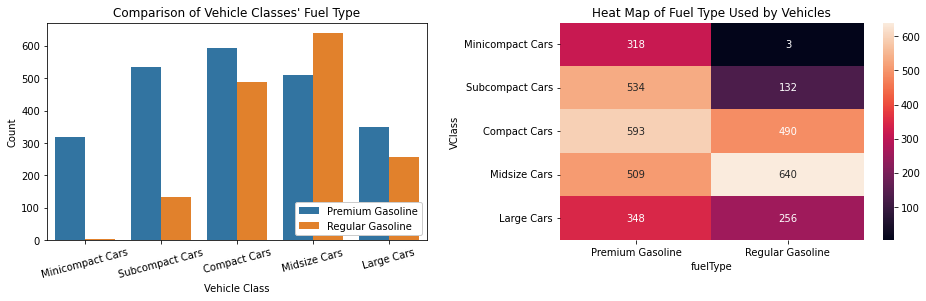

In [50]:
# Initialize a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=[16,4], gridspec_kw={'wspace': 0.35})

# LEFT chart: clustered bar chart
sns.countplot(data=df, x='VClass', hue='fuelType', ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=15)
axs[0].legend(loc=4, framealpha=1) # lower right, no transparency
axs[0].set(xlabel='Vehicle Class', ylabel='Count', 
           title='Comparison of Vehicle Classes\' Fuel Type')

# RIGHT chart: heat map
sns.heatmap(cf_counts, ax=axs[1], annot=True, fmt='d')
axs[1].set_title('Heat Map of Fuel Type Used by Vehicles')

plt.show()

We can see that more cars use premium gas over regular gas, and that the smaller cars are biased towards the premium gas grade. It is only in midsize sedans where regular gasoline was used in more cars than premium gasoline.



## Faceting
One general visualization technique that will be useful for you to know about to handle plots of two or more variables is **faceting**. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

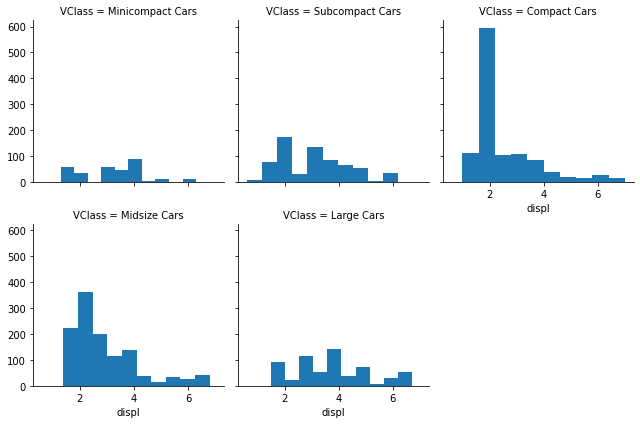

In [52]:
# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3)
g.map(plt.hist, 'displ');

# Adapted Bar Charts
Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's `barplot` function. As an alternative, the `pointplot` function can be used to plot the averages as points rather than bars.

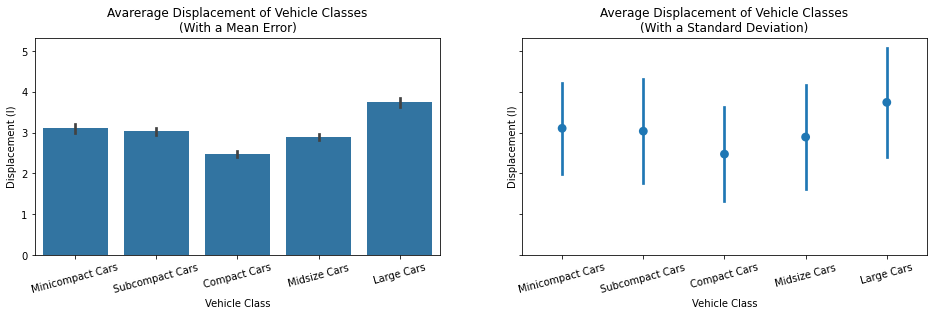

In [59]:
# Initialize a figure with two subplots
fig, axs = plt.subplots(1, 2, sharey=True, figsize=[16,4])

# LEFT chart: bar chart
sns.barplot(data=fuel_econ, x='VClass', y='displ', color=base_color, ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=15)
axs[0].set(xlabel='Vehicle Class', ylabel='Displacement (l)', 
           title='Avarerage Displacement of Vehicle Classes\n(With a Mean Error)')

# RIGHT chart: point plot
sns.pointplot(data=fuel_econ, x='VClass', y='displ', color=base_color,
              ci='sd', linestyles='', ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=15)
axs[1].set(xlabel='Vehicle Class', ylabel='Displacement (l)', 
           title='Average Displacement of Vehicle Classes\n(With a Standard Deviation)')

plt.show()

Note: Matplotlib's `hist()` function can also be adapted so that bar heights indicate value other than a count of points through the use of the "weights" argument.

## Line Plots
The **line plot** is a fairly common plot type that is used to plot the trend of one numeric variable against the values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a **time series plot**. For example, we have only one observation per time period, like in stock or currency charts

In [60]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] < ... <
                                     (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

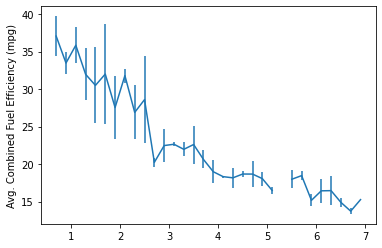

In [62]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

### Combined Fuel Milage per Manufacturer
- Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot.
- Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

In [78]:
# Select manufacturers with at least 80 cars
make_vc = fuel_econ.make.value_counts()
makes = make_vc[make_vc>80].index
df = fuel_econ.loc[fuel_econ.make.isin(makes)].copy()

# Sort manufactures by average milage
makes = df.groupby('make')['comb'].mean().sort_values(ascending=False).index
makes

Index(['Toyota', 'Honda', 'Mazda', 'Hyundai', 'Kia', 'MINI', 'Volkswagen',
       'Chevrolet', 'Ford', 'Lexus', 'Audi', 'BMW', 'Infiniti', 'Dodge',
       'Cadillac', 'Mercedes-Benz', 'Porsche', 'Jaguar'],
      dtype='object', name='make')

In [79]:
# Return the manufacturers with the categories and orderedness
omakes = pd.api.types.CategoricalDtype(ordered=True, categories=makes)

# Convert the "make" column from a plain object type into an ordered categorical type 
df['make'] = df['make'].astype(omakes);
df.shape

(3208, 20)

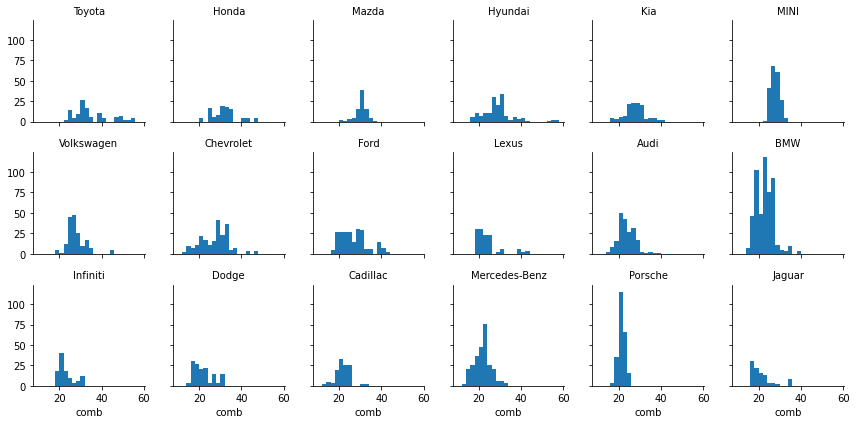

In [87]:
# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data=df, col='make', col_wrap=6, height=2)
g.map(plt.hist, 'comb', bins=np.arange(10, df['comb'].max()+2, 2))
g.set_titles('{col_name}');

Due to the large number of manufacturers to plot, we've gone with a faceted plot of histograms rather than a single figure like a box plot. As part of setting up the FacetGrid object, we have sorted the manufacturers by average mileage, and wrapped the faceting into a six column by three row grid. One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.

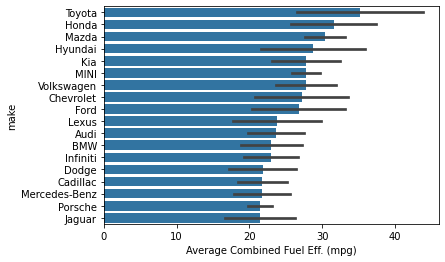

In [84]:
# Plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset
sns.barplot(data=df, x='comb', y='make', color=base_color, ci='sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)');

Seaborn's barplot function makes short work of this exercise. Since there are a lot of 'make' levels, we've made it a horizontal bar chart. In addition, I've set the error bars to represent the standard deviation of the car mileages.